In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from matplotlib.ticker import ScalarFormatter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [2]:
df=pd.read_csv('houseprice.csv')
x_train=np.array(df['House Size (sq. ft.)'],dtype='float')
print(x_train.shape)
y_train=np.array(df['Price (USD)'],dtype='float')
print(y_train.shape)


(10,)
(10,)


In [3]:
# # Dropping rows with missing values
df_cleaned = df.dropna()

# 2. Outlier Detection and Removal using IQR
Q1 = df_cleaned['House Size (sq. ft.)'].quantile(0.25)
Q3 = df_cleaned['House Size (sq. ft.)'].quantile(0.75)
IQR = Q3 - Q1

# Removing outliers
df_no_outliers = df_cleaned[(df_cleaned['House Size (sq. ft.)'] >= Q1 - 1.5 * IQR) &
                            (df_cleaned['House Size (sq. ft.)'] <= Q3 + 1.5 * IQR)]

# 3. Feature Scaling
scaler = StandardScaler()
df_no_outliers['Scaled_Size'] = scaler.fit_transform(df_no_outliers[['House Size (sq. ft.)']])

df_no_outliers.to_csv('houseprice.csv',index=False)
# Convert to numpy arrays for mathematical operations
x_train = df['House Size (sq. ft.)']
y_train = df['Price (USD)']


In [7]:
x_train=np.array(df['House Size (sq. ft.)'],dtype='float')
y_train=np.array(df['Price (USD)'],dtype='float')
#selecting the m for number of training ex
m=y_train.shape[0]
print(m)

10


In [8]:
i=0#for specfic set like x^1,y^1
print(f"training set with i=0 ({x_train[i]},{y_train[i]})")

training set with i=0 (1500.0,300000.0)


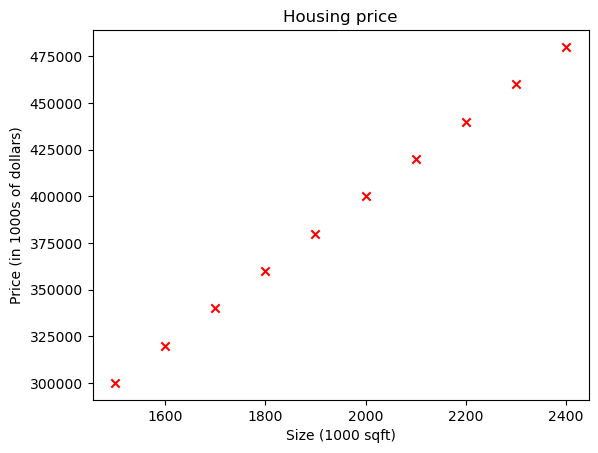

In [9]:
plt.scatter(x_train,y_train,marker='x',color='red')
plt.title('Housing price')
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.show()

In [10]:
# w1,b1 = np.polyfit(x_train, y_train, 1)#to get direct w and b
sum_x=np.sum(x_train)
sum_y=np.sum(y_train)
sum_xy=np.sum(x_train*y_train)
sum_x_sqr=np.sum(x_train**2)
w=(m*sum_xy-sum_x*sum_y)/(m*(sum_x_sqr)-sum_x**2)
b = (sum_y - w * sum_x) / m


In [11]:
def compute_model_output(w,b,x):
    m=x.shape[0]
    f_wb=np.zeros(m)
    for i in range(m):
        f_wb[i]=w*x[i]+b
    return f_wb
    

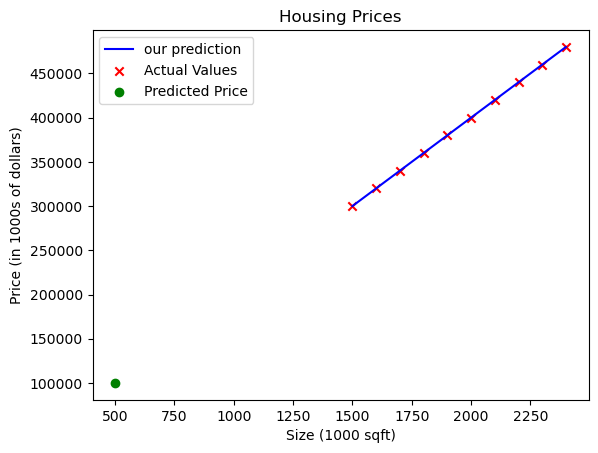

In [12]:
reg_output=compute_model_output(w,b,x_train)
reg_out=w*x_train+b#getting the direct output with data vectorization
house_size=500.0
predicted_price=w*house_size+b
plt.plot(x_train,reg_out,c='b',label="our prediction")
plt.scatter(x_train,y_train,marker='x',c='r',label="Actual Values")
plt.scatter(house_size, predicted_price, color='green', marker='o',  label='Predicted Price')

# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()

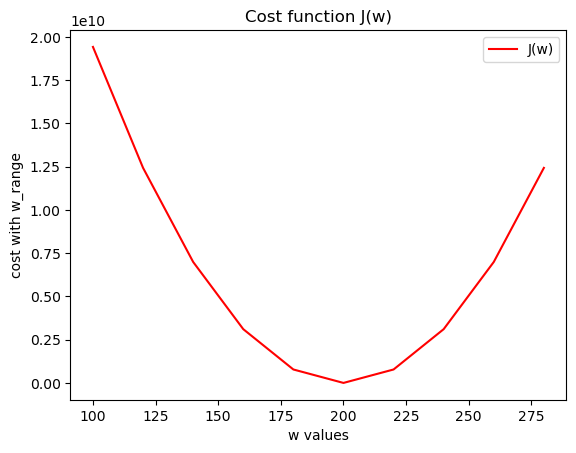

In [16]:
#error prediction and cost fxn 
#f(x) depends on x
#J(w,b) depends on w and b
#case1 with varying w
def cost_compute(w,b,x,y):
    prediction=w*x+b
    errors=prediction-y
    cost=(1/(2*m))*(np.sum(errors**2))
    return cost
w_range = np.arange(100, 300, 20, dtype='float')
b_range=np.arange(-5,5,1,dtype='float')
cost_range_w=[]
for i in w_range:
    cost=cost_compute(i,b,x_train,y_train)
    cost_range_w.append(cost)
plt.plot(w_range,cost_range_w,c='red',label='J(w)')
plt.title('Cost function J(w)')
plt.xlabel('w values')
plt.ylabel('cost with w_range')
plt.legend()
plt.show()

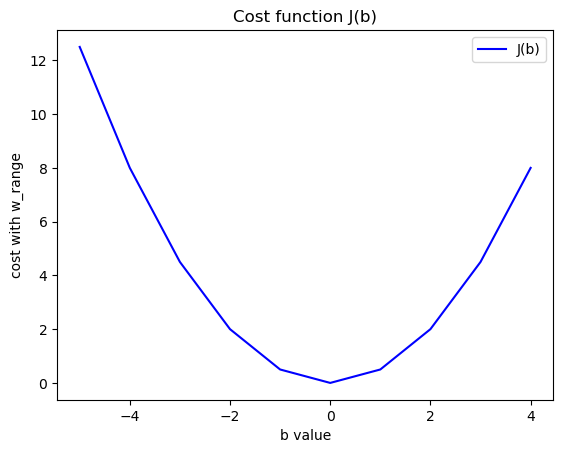

In [17]:
#case 2 cost fxn with varying b 
b_range=np.arange(-5,5,1,dtype='float')
cost_range_b=[]
for i in b_range:
    cost=cost_compute(w,i,x_train,y_train)
    cost_range_b.append(cost)
plt.plot(b_range,cost_range_b,c='b',label='J(b)')
plt.xlabel('b value')
plt.ylabel("cost with w_range")
plt.title('Cost function J(b)')
plt.legend()
plt.show()

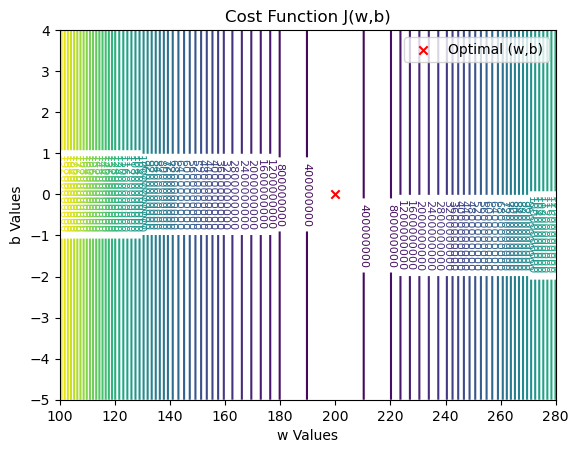

In [18]:
#case 3 cost fxn with varying both w and b (contour graph and 3d graph)
W,B=np.meshgrid(w_range,b_range)
Cost=np.zeros(W.shape)
for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        Cost[i,j]=cost_compute(W[i,j],B[i,j],x_train,y_train)
cp=plt.contour(W,B,Cost,levels=50,cmap='viridis')
plt.clabel(cp,inline=True,fontsize=8)
plt.title('Cost Function J(w,b)')
plt.xlabel('w Values')
plt.ylabel('b Values')
plt.scatter(w,b,color='red',marker='x',label='Optimal (w,b)')
plt.legend()
plt.show()

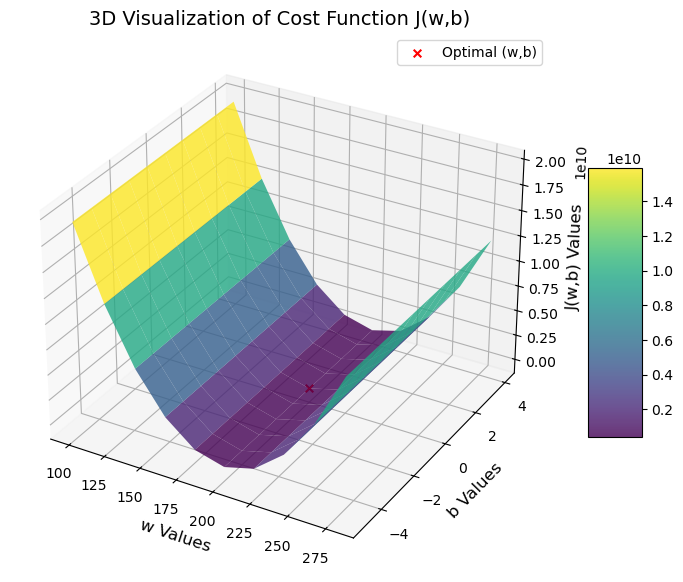

In [19]:
#case 3 with 3d graph
fig=plt.figure(figsize=(10,7))
ax=fig.add_subplot(111,projection='3d')
surface=ax.plot_surface(W,B,Cost,cmap='viridis',edgecolor='none',alpha=0.8)
optcost=cost_compute(w,b,x_train,y_train)
ax.scatter(w,b,optcost,color='red',marker='x',s=30,label='Optimal (w,b)')
ax.set_title('3D Visualization of Cost Function J(w,b)',fontsize=14)
ax.set_xlabel('w Values',fontsize=12)
ax.set_ylabel('b Values',fontsize=12)
ax.set_zlabel('J(w,b) Values',fontsize=12)
fig.colorbar(surface,shrink=0.5,aspect=5)
ax.legend()
plt.show()